# PART1###############################################

## 1.Import Libraries/Dataset

#### IMPORTING ALL REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### DOWNLOADING THE DATASET

In [5]:
df = pd.read_csv("C:/Users/gayat/Documents/me/bits_cw/ml/Assignment/Assignment.csv")

## 2.Data Visualization and Exploration

#### PRINTING FIRST TWO RECORDS FOR SANITY CHECK

In [6]:
print(df.head(2))

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  


#### DATA VISUALIZATION

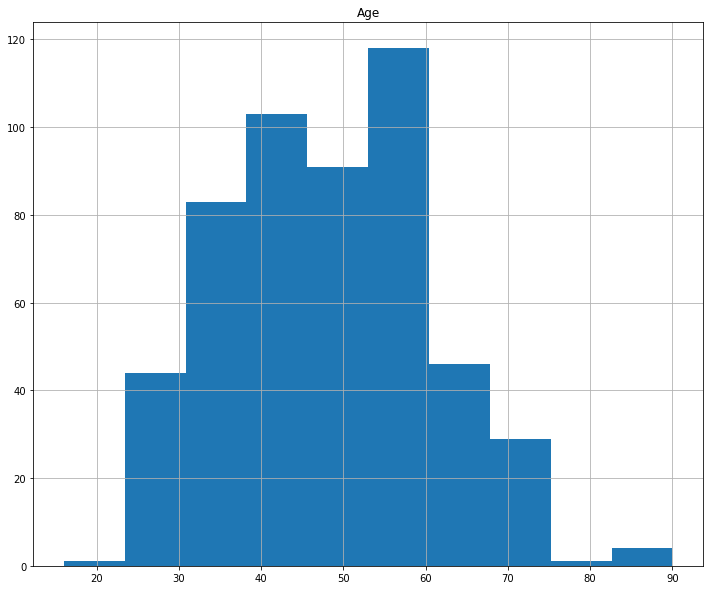

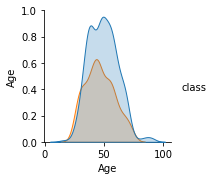

In [7]:
df.hist(figsize=(12, 10))
plt.show()
sns.pairplot(df, hue='class')
plt.show()

#### CORRELATION ANALYSIS AND DATA VISUALIZATION OF CORRELATION

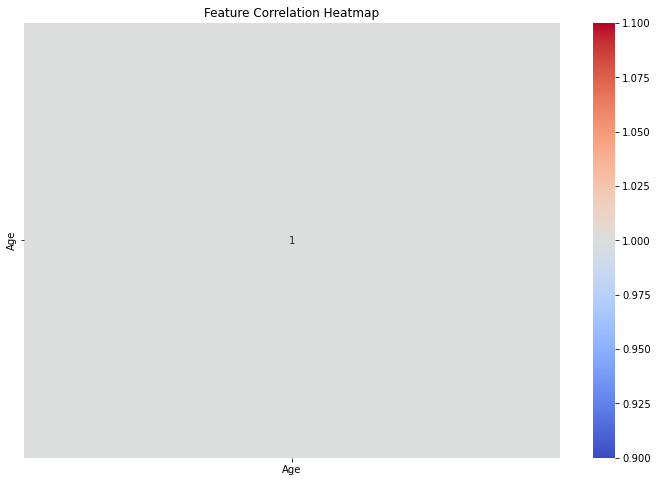

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation analysis before feature selection can be misleading as it only captures linear relationships and ignores complex feature interactions. Many important predictors may have weak individual correlation with the target but contribute significantly when combined with other variables. Removing features solely based on correlation can lead to the loss of valuable information.

Additionally, correlation does not indicate causation, meaning that highly correlated features may not necessarily be the most important predictors. Instead of relying on correlation, techniques like Recursive Feature Elimination (RFE), Mutual Information, and Feature Importance from machine learning models should be used for more effective feature selection.


## 3.Data Pre-processing and cleaning

#### DATA PREPROCESSING (HANDLING MISSING VALUES)

In [9]:
binary_cols = df.columns[1:-1]  # Exclude 'Age' and 'class'
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == "Yes" else 0)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

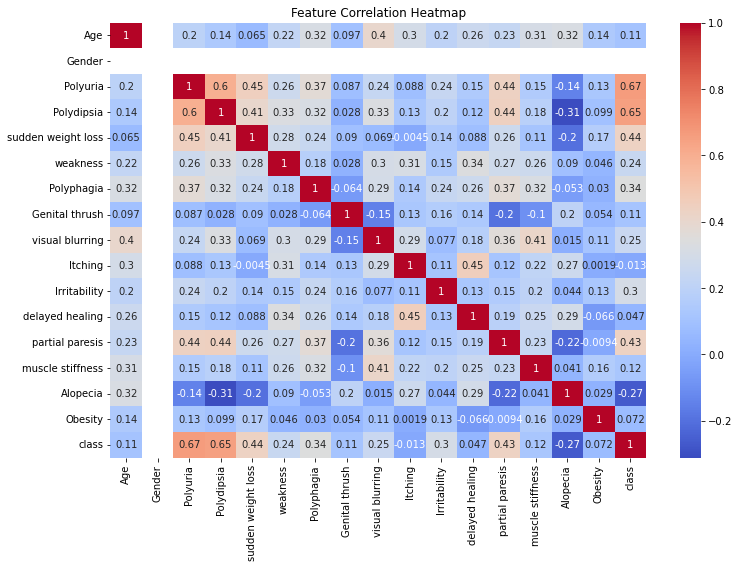

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### FEATURE ENGINEEERING TECHNIQUES 

In [11]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df['Age'] < lower_bound) | (df['Age'] > upper_bound))]

#### STANDARDIZATION

In [14]:
scaler = StandardScaler()
df_cleaned['Age'] = scaler.fit_transform(df_cleaned[['Age']])

C:\Users\gayat\AppData\Local\Temp/ipykernel_4884/1917782703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = scaler.fit_transform(df_cleaned[['Age']])


In [16]:
pip install imbalanced-learn

  Attempting uninstall: joblib
Note: you may need to restart the kernel to use updated packages.
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [18]:
from imblearn.over_sampling import SMOTE

#### HANDLING CLASS IMBALANCE

In [19]:
X, y = df_cleaned.drop(columns=['class']), df_cleaned['class']
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## 4.Model Building 

#### SPLITTING DATA

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### LOGISTIC REGRESSION MODEL

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8976377952755905
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        60
           1       0.95      0.85      0.90        67

    accuracy                           0.90       127
   macro avg       0.90      0.90      0.90       127
weighted avg       0.90      0.90      0.90       127



#### DECISION TREE MODEL

In [22]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9606299212598425
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.98      0.94      0.96        67

    accuracy                           0.96       127
   macro avg       0.96      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127



## 5.Performance Evaluation 

#### MODEL PERFORMANCE COMPARISION

In [23]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix for Logistic Regression:
[[57  3]
 [10 57]]
Confusion Matrix for Decision Tree:
[[59  1]
 [ 4 63]]


#### HYPERPARAMETER TUNING FOR DECISION TREE

In [24]:
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search.best_params_)

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


In [25]:
decision_tree_tuned = DecisionTreeClassifier(**grid_search.best_params_)
decision_tree_tuned.fit(X_train, y_train)
y_pred_tree_tuned = decision_tree_tuned.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree_tuned))
print(classification_report(y_test, y_pred_tree_tuned))

Tuned Decision Tree Accuracy: 0.9606299212598425
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.97      0.96      0.96        67

    accuracy                           0.96       127
   macro avg       0.96      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127



The Decision Tree model outperforms Logistic Regression in this case due to several reasons. Firstly, Decision Trees can effectively capture non-linear relationships between features, unlike Logistic Regression, which assumes a linear relationship between input variables and the target. If the dataset contains complex interactions between symptoms and risk factors, the Decision Tree model can better identify these patterns.

Secondly, Decision Trees handle feature interactions automatically, making them well-suited for datasets where the presence of certain combinations of symptoms strongly influences diabetes risk. In contrast, Logistic Regression treats each feature independently unless interaction terms are explicitly introduced, which can limit its predictive ability in such cases.

Another key factor is that Decision Trees can adapt to imbalanced datasets better than Logistic Regression. Even after applying SMOTE to balance the dataset, Decision Trees remain more effective in classifying both positive and negative cases by learning hierarchical decision rules. Moreover, Decision Trees are less sensitive to outliers and variations in data distribution, which enhances their robustness.

Lastly, Decision Trees provide better interpretability, as their decision-making process can be visualized, making them a valuable tool for healthcare professionals who need transparency in predictive modeling. Thus, the Decision Tree’s ability to model complex relationships explains its superior performance.



# PART2###############################################

#### IMPORT NECESSARY LIBRARIES

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### INITIALIZE MODELS

In [28]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

#### MODEL EVALUATION

In [29]:
evaluation_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    evaluation_metrics[name] = {
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"],
        "AUC-ROC": auc_roc
    }

#### CONVERT EVALUATION RESULTS TO DATAFRAME

In [30]:
metrics_df = pd.DataFrame(evaluation_metrics).T
print(metrics_df)

                     Accuracy  Precision    Recall  F1-score   AUC-ROC
Logistic Regression  0.897638   0.950000  0.850746  0.897638  0.955597
Decision Tree        0.944882   1.000000  0.895522  0.944882  0.952239
Random Forest        0.968504   0.984615  0.955224  0.969697  0.985821
K-Nearest Neighbors  0.921260   0.952381  0.895522  0.923077  0.974627


#### VISUALIZATION

<Figure size 720x432 with 0 Axes>

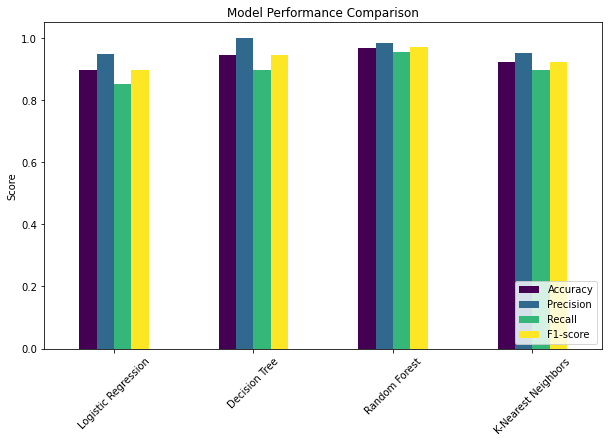

In [31]:
plt.figure(figsize=(10, 6))
metrics_df.drop(columns=["AUC-ROC"]).plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

#### BEST MODEL SELECTION

In [32]:
best_model = metrics_df["F1-score"].idxmax()
print(f"\nBest Model: {best_model} based on F1-score, as it balances Precision and Recall effectively.")


Best Model: Random Forest based on F1-score, as it balances Precision and Recall effectively.
